Basic Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2420 entries, 2021-09-04 18:23:00 to 2021-09-04 19:03:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Tank_1       2420 non-null   int64
 1   Tank_2       2420 non-null   int64
 2   Tank_3       2420 non-null   int64
 3   Pump_1       2420 non-null   int64
 4   Pump_2       2420 non-null   int64
 5   Flow_sensor  2420 non-null   int64
dtypes: int64(6)
memory usage: 132.3 KB
None

Summary Statistics:
            Tank_1       Tank_2       Tank_3       Pump_1       Pump_2   
count  2420.000000  2420.000000  2420.000000  2420.000000  2420.000000  \
mean    686.320661   714.946281   922.677686     0.300000     0.243802   
std     654.955181   656.051613   942.572849     0.458352     0.429463   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     5.000000    73.250000     0.000000     0.000000   
50%     5

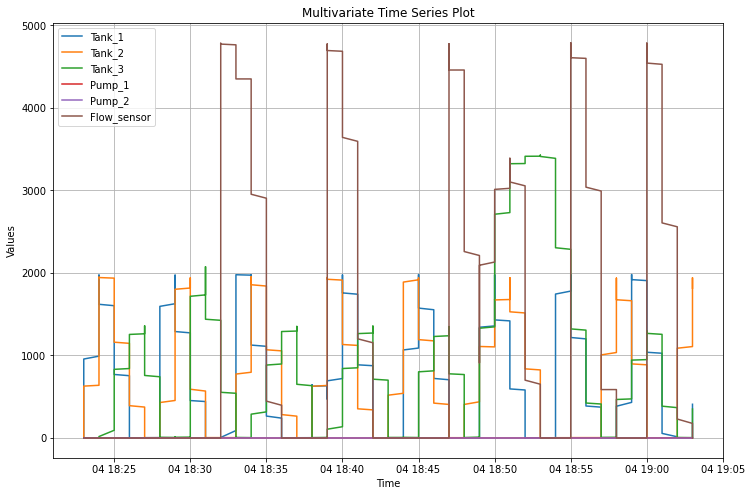

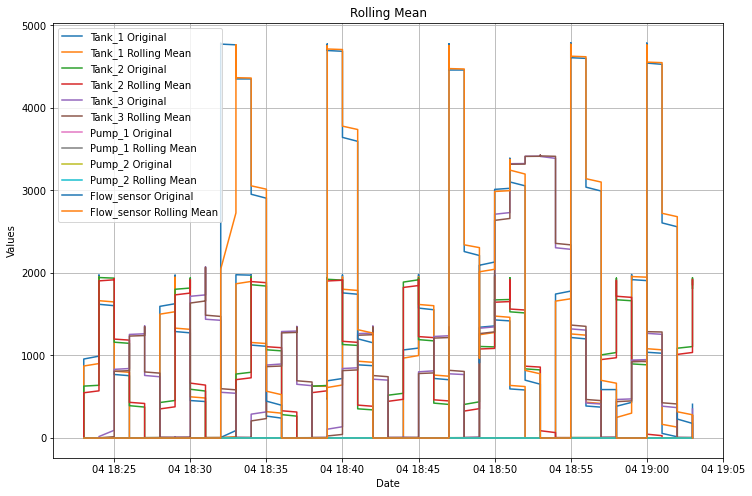

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by sett

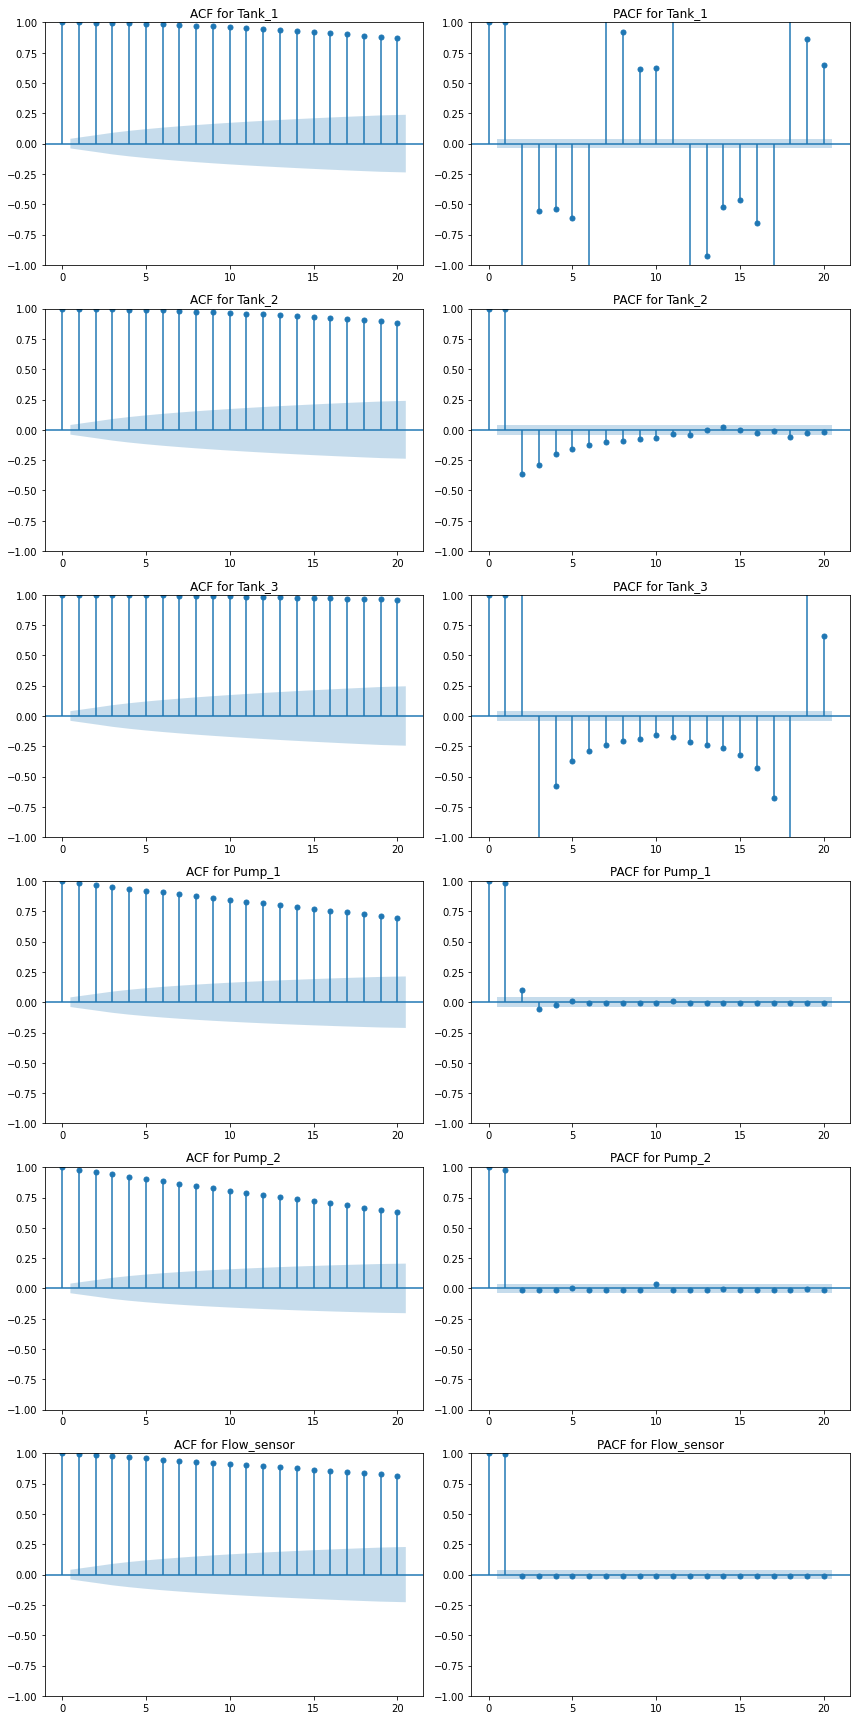

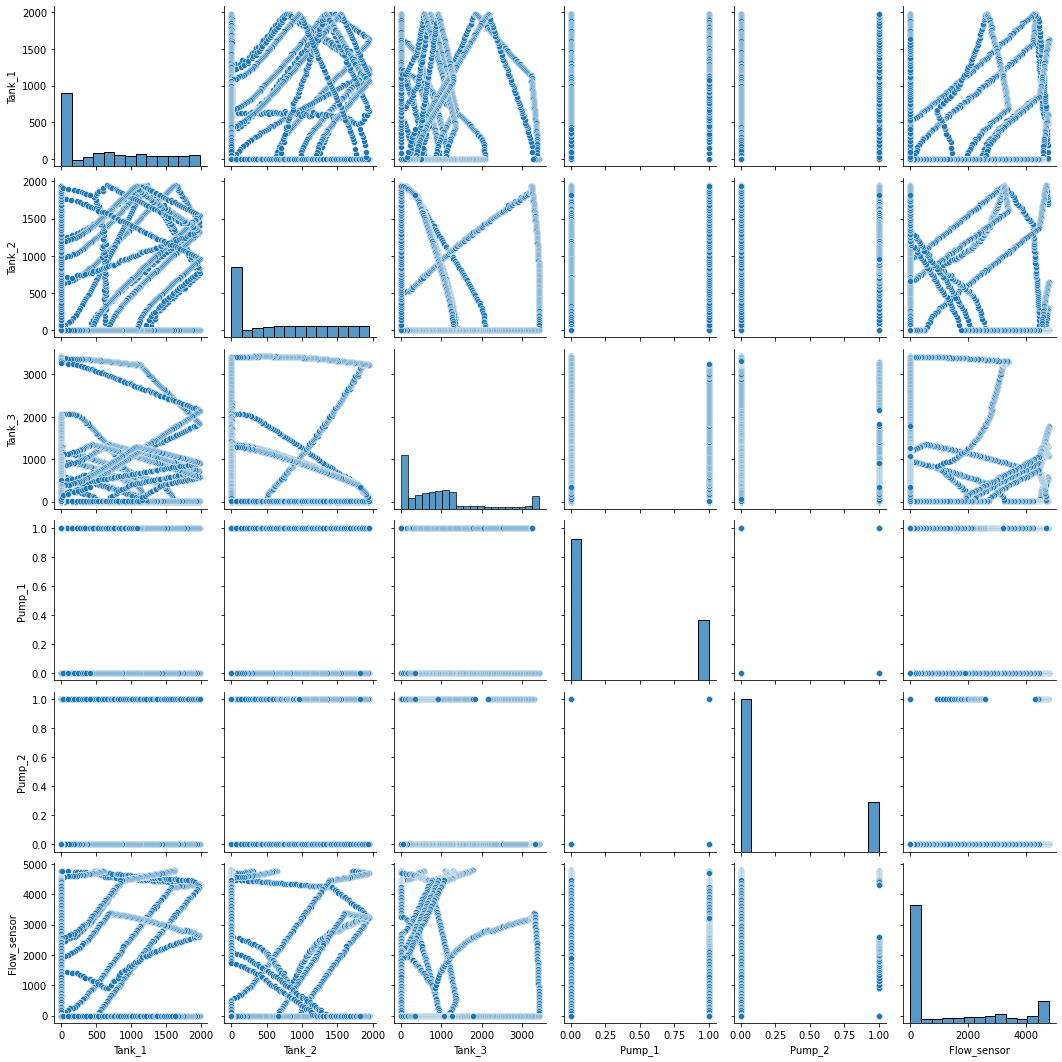


Correlation Matrix:
               Tank_1    Tank_2    Tank_3    Pump_1    Pump_2  Flow_sensor
Tank_1       1.000000  0.398673 -0.040350  0.137978  0.264954     0.233363
Tank_2       0.398673  1.000000 -0.092597  0.326358  0.111680    -0.042995
Tank_3      -0.040350 -0.092597  1.000000 -0.409422 -0.199873     0.051986
Pump_1       0.137978  0.326358 -0.409422  1.000000  0.252011    -0.039818
Pump_2       0.264954  0.111680 -0.199873  0.252011  1.000000    -0.054597
Flow_sensor  0.233363 -0.042995  0.051986 -0.039818 -0.054597     1.000000


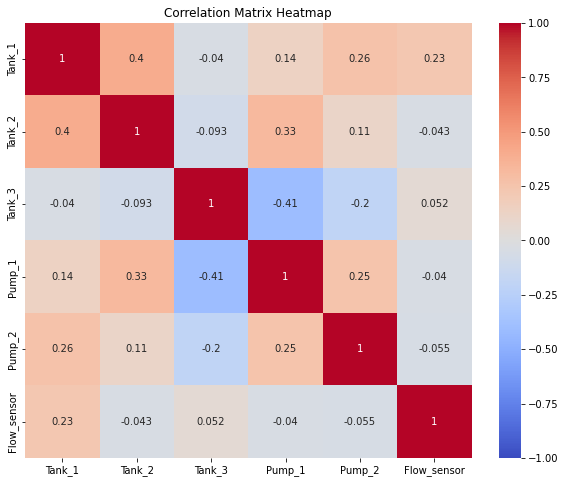

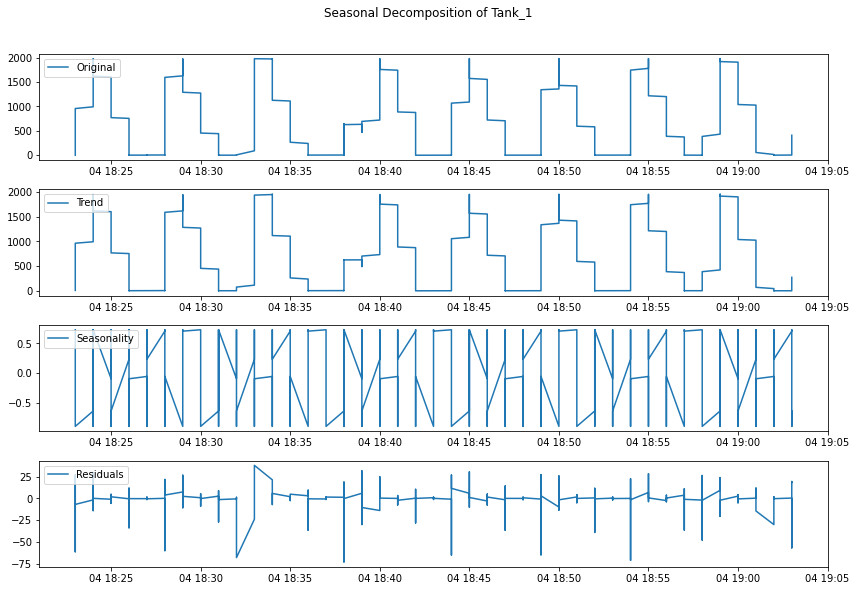

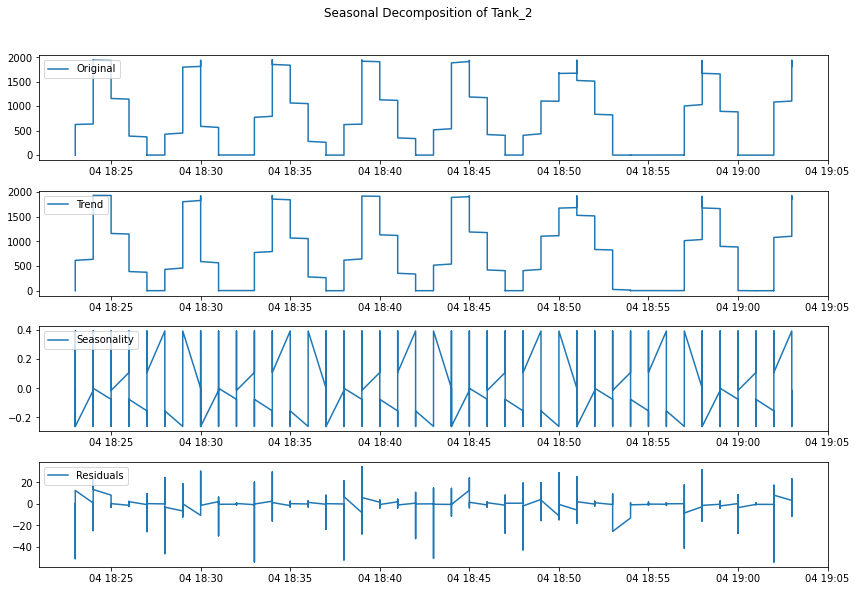

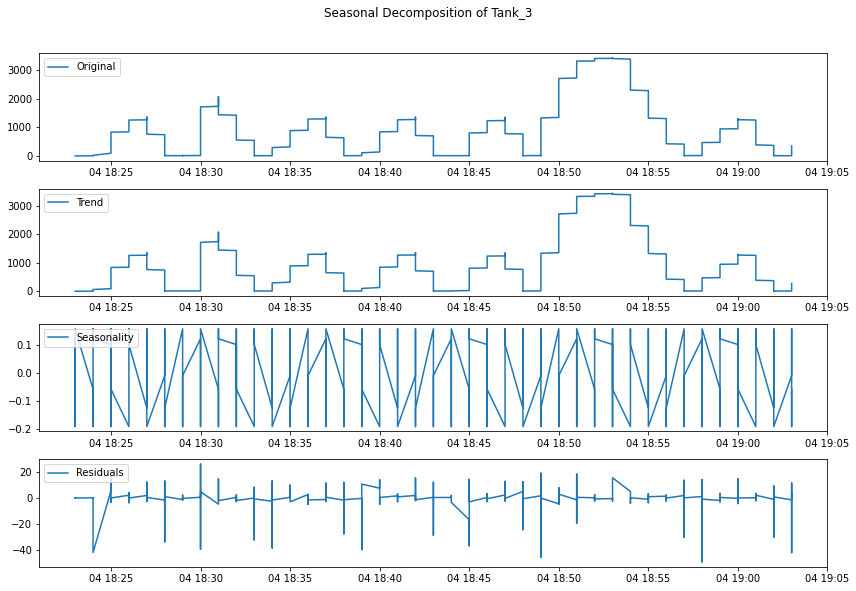

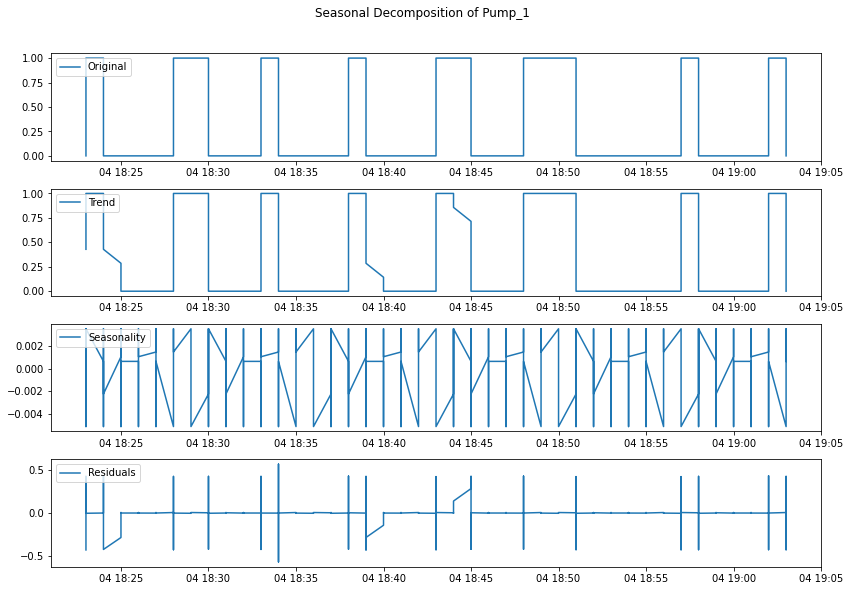

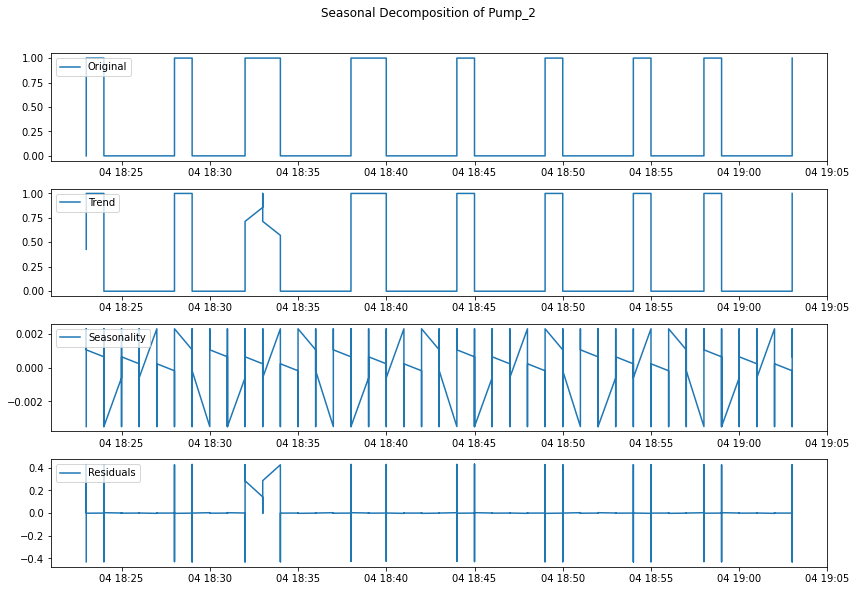

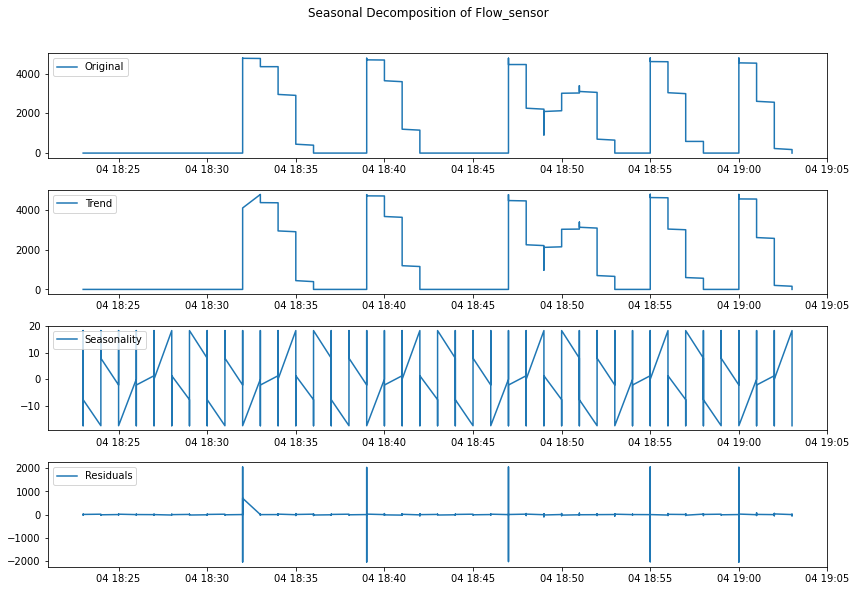

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# %matplotlib inline

# Load your dataset
# Assuming your dataset is in a CSV file with a datetime index
# For example: df = pd.read_csv('your_multivariate_timeseries_data.csv', parse_dates=['Date'], index_col='Date')
# Replace 'your_multivariate_timeseries_data.csv' and 'Date' with your actual file name and date column name

# Sample data loading
# df = pd.read_csv('your_multivariate_timeseries_data.csv', parse_dates=['Date'], index_col='Date')

# Reading the multivariate timeseries data
file_name = 'phy_cps.csv'
df = pd.read_csv(file_name, index_col=0, parse_dates=True)
df = df.dropna()

# dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
# data = np.random.randn(100, 3).cumsum(axis=0)
# df = pd.DataFrame(data, index=dates, columns=['Value1', 'Value2', 'Value3'])

# Basic Information
print("Basic Information:")
print(df.info())

# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Plot the Time Series for each variable
plt.figure(figsize=(12, 8))
for column in df.columns:
    # plt.plot(df.index, df[column], label=column)
    plt.plot(df[column], label=column)
plt.title('Multivariate Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()



# Plotting the Moving Averages for each variable
rolling_window = 7
df_rolling = df.rolling(window=rolling_window).mean()

plt.figure(figsize=(12, 8))
for column in df.columns:
    # plt.plot(df.index, df[column], label=f'{column} Original')
    # plt.plot(df_rolling.index, df_rolling[column], label=f'{column} Rolling Mean')
    plt.plot(df[column], label=f'{column} Original')
    plt.plot(df_rolling[column], label=f'{column} Rolling Mean')
plt.title('Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# Plot ACF and PACF for each variable
fig, axes = plt.subplots(len(df.columns), 2, figsize=(12, 4 * len(df.columns)))
for i, column in enumerate(df.columns):
    plot_acf(df[column], lags=20, ax=axes[i, 0])
    plot_pacf(df[column], lags=20, ax=axes[i, 1])
    axes[i, 0].set_title(f'ACF for {column}')
    axes[i, 1].set_title(f'PACF for {column}')
plt.tight_layout()
plt.show()


# Pairwise Relationships
sns.pairplot(df)
plt.show()


# Correlation Matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Seasonal Decomposition (for each variable)
from statsmodels.tsa.seasonal import seasonal_decompose

for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='additive', period=rolling_window)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(df[column], label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.suptitle(f'Seasonal Decomposition of {column}', y=1.02)
    plt.tight_layout()
    plt.show()

